<p><b>Для начала ответ на главный вопрос: а где мне, дизайнеру, пригодится линейная регрессия?</b> Она популярна для решения прикладных задач, вроде прогнозирования. Это в первую очередь таргетированная реклама, нейрон в слоях классификации, простенькие системы скоринга для банков. В общем, любые задачи, где отношения между переменными линейны по своей природе: как возраст влияет на здоровье или сколько операторов в банке справляются с поставленными KPI.</p>

<p>Линейная регрессия позволяет прогнозировать зависимость переменной Y на основе переменной X. Визуализируя эту зависимость на графике, получается прямая линия, часто называемая «линия наилучшего соответствия». Линейная регрессия весьма проста, мы прогнозируем Y с учетом X. Есть целевая target-переменная, и потенциальное множество значений для target-переменной бесконечно. <b>Пример:</b> предсказание стоимости квартиры, подавая на вход количество комнат и удаленность от метро, это задача для линейной регрессии. Метрическая модель отвечает на метрическую гипотезу, или целевая переменная линейно зависит от признаков объектов. Типовая задача это прогноз выручки за год магазина, где гипотеза это зависимость количества магазинов и объема выручки. В общем, модель про деньги, поэтому очень популярна в банках: выдавать кредиты надо c умом, каждый параметр влияет на решение о кредите (заработок, дети, просрочки, стаж, состояние здоровья, риск дефолта).</p>

In [1]:
# https://your-scorpion.ru/linear-regression-python/

import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

<h4>Итак, у нас есть отдел дизайна с 18 дизайнерами, и мы хотим узнать, кто из наших дизайнеров работает наиболее эффективно.</h4>
<p>Условие задачи: я, как руководитель дизайн-отдела, хочу понять, кто из моих сотрудников самый эффективный. 
Все работы дизайнеров тестируются по метрике SUM и я точно знаю, у кого какое качество дизайна. 
Теперь мне надо правильно соотнести количество лет опыта и результативность работы.</p>
<p>В рамках статьи и в рамках терминологии машинного обучения мы будем называть наши наблюдения признаками. Признак это любая характеристика исследуемых данных, выраженная числом. Для начала укажем кол-во лет опыта у специалистов и посмотрим на форму данных командой командой x.shape. У нас всего 18 наблюдений (18 дизайнеров), это один набор признаков. Для добавления второго набора признаков создаем двухмерный массив NumPy. Второй набор данных это результативность (SUM), некий средний балл в диапазоне от 0 до 100. Весь наш набор данных будет называться «признаковым описанием». Внесли данные и визуализировали</p>

In [2]:
x = np.array([[1,3,4,5,11,0,8,6,3,7,16,0,2,3,2,4,21,4]])
print (x)
print (x.shape)
y = np.array([[32,54,54,35,86,12,74,67,35,75,94,12,56,54,40,35,87,47]])
print (y)
print (y.shape)

[[ 1  3  4  5 11  0  8  6  3  7 16  0  2  3  2  4 21  4]]
(1, 18)
[[32 54 54 35 86 12 74 67 35 75 94 12 56 54 40 35 87 47]]
(1, 18)


In [3]:
matplotlib.use('TkAgg')
from matplotlib import pyplot as plt
plt.scatter(x,y)

[[32 54 54 35 86 12 74 67 35 75 94 12 56 54 40 35 87 47]]
(1, 18)


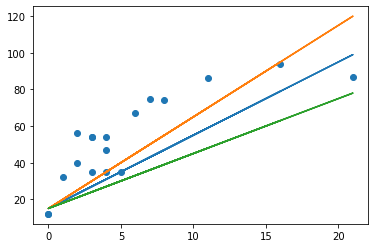

In [4]:
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
 
y = np.array([[32, 54, 54, 35, 86, 12, 74, 67, 35, 75, 94, 12, 56, 54, 40, 35, 87, 47]])
print(y)
print(y.shape)

# Так как у нас линейная регрессия, попробуем на глаз подобрать вес для признака и интерсепт, и нарисовать по ним линию. 
# Интерсепт может быть 15, а какой наклон? 
# Наклон сложно определить из-за разного масштаба по горизонтали и вертикали. Но попробуем на глаз 3, 4, 5

%matplotlib inline
X = np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],[1,3,4,5,11,0,8,6,3,7,16,0,2,3,2,4,21,4]])
plt.scatter(X[1], y)
plt.plot(X[1], 15*np.ones(18) + X[1]*4)
plt.plot(X[1], 15*np.ones(18) + X[1]*5)
plt.plot(X[1], 15*np.ones(18) + X[1]*3)
plt.show()

In [5]:
# Допустим, я думаю что значение 5 наиболее близко к реальности. Теперь посмотрим на ошибки, ведь чем меньше ошибка, тем качественнее модель. 
# Ошибки могут быть разные, сейчас мы подсчитаем наши предсказания, возьмем ошибку и просуммируем для каждого наблюдения. 
# Подход весьма примитивен, но это хорошая демонстрация.

y_pred1 = 15*np.ones(18) + X[1]*5
print (y_pred1)
err = np.sum(y - y_pred1)
print (err)

# Получаем число 179. И это весьма большое значение, значит, мы слишком мало предсказывали. 
# Отрицательное значение значило бы перепрогноз, это более желанный результат. 
# Лучше переработать, чем недоработать.

[ 20.  30.  35.  40.  70.  15.  55.  45.  30.  50.  95.  15.  25.  30.
  25.  35. 120.  35.]
179.0


<img src="img/img_1.png" width="400px">

<img src="img/img_0.png" width="400px"/>
<br>
X — матрица наблюдений и признаков размерности строк на столбцов. y — ответ (нужно предсказать).

In [6]:
# Итак, регрессия это целевая переменная, например, потенциальная выручка магазина. 
# И нам надо правильно выбрать функци потерь. MSE это квадратичная функция потерь, считаем матрицу Гессе и понимаем, 
# что она удовлетворяет достаточному условию минимума. Но сейчас мы посмотрим на MAE, так как она дифференцируема

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred) ** 2)
    return err
 
print ('MSE:', calc_mse (y, y_pred1))
 
 
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err
 
print ('MAE:', calc_mae(y, y_pred1))

MSE: 326.1666666666667
MAE: 14.944444444444445


In [7]:
# Следующим шагом находим из квадртаной матрицы обратную матрицу
print (np.linalg.inv(np.dot(X, X.T)))#, результат [[ 0.11485909 -0.01067464] [-0.01067464 0.00192143]]

[[ 0.11485909 -0.01067464]
 [-0.01067464  0.00192143]]


In [8]:
# И последний шаг, умножаем на транспонированную матрицу и умножаем на y. 
# И мы получаем набор весов. Это два числа, которые ранее мы пытались угадать на глаз, 
# в этот раз их угадала система:[[32.48548249] [ 3.64261315]]
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y.T
print (W)

[[32.48548249]
 [ 3.64261315]]


(2, 18)
(18, 2)
[[  18  100]
 [ 100 1076]]
[[ 0.11485909 -0.01067464]
 [-0.01067464  0.00192143]]
[[32.48548249]
 [ 3.64261315]]


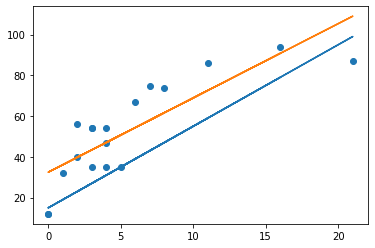

In [9]:
X = np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],[1,3,4,5,11,0,8,6,3,7,16,0,2,3,2,4,21,4]])
y = np.array([[32,54,54,35,86,12,74,67,35,75,94,12,56,54,40,35,87,47]])
 
print (X.shape)
print (X.T.shape)
print (np.dot(X, X.T))
print (np.linalg.inv(np.dot(X, X.T)))
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y.T
print (W)
 
plt.scatter(X[1], y)
plt.plot(X[1], 15*np.ones(18) + X[1]*4)
plt.plot(X[1], W[0] + W[1] * X[1])
 
plt.show()

# На примере ниже видно, что построенная машиной линейная регрессия более жестко отсеивает людей, чем сделал бы это я «на глаз». 
# Это элементарный пример использования машинного обучения для решения бизнес-задач.
# Оранжевая линия основана на значениях, которые мы подсчитали с использованием весов.

In [10]:
# Теперь подсчитаем новые MAE и MSE для свеженайденных значений

y_ml=W[0] + W[1] * X[1]
print ('MSE:', calc_mse (y, y_ml))
print ('MAE:', calc_mae(y, y_ml))

# Ранее MSE = 326.1666666666667 и MAE = 14.944444444444445, 
# сейчас MSE = 174.00144700635732 и MAE = 11.478128854730052
# Уже куда лучше (помним, чем значение ближе к нулю, тем лучше)

MSE: 174.00144700635732
MAE: 11.478128854730052


<p>Давайте пощупаем в деле <b>градиентный спуск</b>. Он перебирает разные варианты, и двигается к поставленной цели. Матрицы позволяют сразу выполнять много операций. В математическом анализе есть тема поиска частных производных итеративным перебором весов в MSE. Этим и займемся.</p>

In [11]:
# Процесс минимизации ошибки в градиентном спуске строится на трехмерном пространстве, 
# образованного за счет двух значений весов (W0 = интерсепт и slope(m) опыт). Мы можем задать начальные веса -1 и 1. 
# Найдем производную для каждого веса векторным способом: где W[0] одновременно и интерсепт и вес. Это вес при псевдо-признаке 1.

import numpy as np
X = np.array( [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 3, 4, 5, 11, 0, 8, 6, 3, 7, 16, 0, 2, 3, 2, 4, 21, 4]])
y = np.array([[32, 54, 54, 35, 86, 12, 74, 67, 35, 75, 94, 12, 56, 54, 40, 35, 87, 47]])
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y.T
print('W:', W)
 
W = np.array([1, 0.75])
gradient_form_direct = 1/18 * 2 * np.sum(X[0] * W[0] - y[0])
print(gradient_form_direct)

# Мы получаем значение -103.44 , и это не очень хорошо. С таким огромным шагом мы можем просто проскочить нужное нам минимальное значение.

W: [[32.48548249]
 [ 3.64261315]]
-103.44444444444444


In [12]:
# Для уменьшения длины шага, мы с каждой итерацией меняем альфу, например, делим на номер итерации. 
# Давайте добавим альфу как скорость обучения, введя alpha = 1e-5 (10 в -5 степени, или 1/10^5). 
# Если видим минус в степени, то отсчет нулей идет назад = — 0,00001.
# Напомню, W[0] это и интерсепт, и вес одновременно. Вес при псевдо-признаке 1.

alpha = 1e-5
gradient_form_direct = alpha * (1/18 * 2 * np.sum(X[0] * W[0] - y[0]))
print(gradient_form_direct)
print(W[0] - gradient_form_direct)

# Получили 1.001, с этим уже можно работать.

-0.0010344444444444446
1.0010344444444443


In [13]:
# Теперь надо указать минимальное значение, и если ошибка приблизилась к нему, то останавливаем алгоритм. 
# Это называется доходимость. Или ручками задаем фиксированное количество шагов, пожалуй, так мы сейчас и поступим. 
# Есть еще нюанс, что при малом количестве данных мы сделаем больше вычислений, чем сделали бы при МНК, 
# но давайте симулировать ситуацию с большими данными на игрушечных данных

import numpy as np
 
X = np.array( [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
               [1, 3, 4, 5, 11, 0, 8, 6, 3, 7, 16, 0, 2, 3, 2, 4, 21, 4]])
y = np.array([32, 54, 54, 35, 86, 12, 74, 67, 35, 75, 94, 12, 56, 54, 40, 35, 87, 47])
W = np.array([1, 0.5])

gradient_form_direct = 1e-4 * (1/18 * 2 * np.sum(X[0] * W[0] - y[0]))
print('gradient form direct:', gradient_form_direct)
print('result:', W[0] - gradient_form_direct)
 
for i in range(2000):
  gradient_form = np.dot(W, X)
  W -= (1e-2 * (1/18 * 2 * np.dot((gradient_form - y), X.T)))
  if i % 200 == 0:
    print(i, W)

gradient form direct: -0.006200000000000001
result: 1.0062
0 [1.97888889 7.75555556]
200 [28.02854376  4.06017628]
400 [31.83681266  3.70338594]
600 [32.39107407  3.65145812]
800 [32.47174214  3.64390046]
1000 [32.4834827   3.64280051]
1200 [32.48519144  3.64264042]
1400 [32.48544013  3.64261712]
1600 [32.48547633  3.64261373]
1800 [32.4854816   3.64261324]


In [14]:
# Добавим новый фактор — месячную зарплату.
X = np.array( [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
               [1, 3, 4, 5, 11, 0, 8, 6, 3, 7, 16, 0, 2, 3, 2, 4, 21, 4],
               [65000, 80000, 85000, 75000, 120000, 25000, 65000, 65000, 29000, 36650, 260000, 12000, 35000, 45600, 25000, 65000, 175000, 73000]])

In [15]:
# Находим для каждого признака минимум и максимум
print (X[1].min(), X[1].max())
print (X[2].min(), X[2].max())

0 21
12000 260000


<p>Нормализация по шагам: (X[1].max() -X [1].min()) получаем размах, максимальный опыт у дизайнеров 21 год. Смотрим на минимальный опыт (X[1] -X [1].min()), получаем [ 1 3 4 5 11 0 8 6 3 7 16 0 2 3 2 4 21 4], минимальный опыт ноль. И приводим все к нужному нам диапазону (X[1] - X[1].min()) / (X[1].max() -X[1].min()), результат вида [0.04761905 0.14285714 0.19047619 0.23809524 0.52380952 0. 0.38095238 0.28571429 0.14285714 0.33333333 0.76190476 0. 0.0952381 0.14285714 0.0952381 0.19047619 1. 0.19047619].</p>

In [16]:
# Теперь сделаем это для двух признаков:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm[1] = (X[1] -X[1].min()) / (X[1].max() -X [1].min())
X_norm[2] = (X[2] -X[2].min()) / (X[2].max() -X [2].min())
print(X_norm)

[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.        ]
 [0.04761905 0.14285714 0.19047619 0.23809524 0.52380952 0.
  0.38095238 0.28571429 0.14285714 0.33333333 0.76190476 0.
  0.0952381  0.14285714 0.0952381  0.19047619 1.         0.19047619]
 [0.21370968 0.27419355 0.29435484 0.25403226 0.43548387 0.05241935
  0.21370968 0.21370968 0.06854839 0.09939516 1.         0.
  0.09274194 0.13548387 0.05241935 0.21370968 0.65725806 0.24596774]]


<p>А теперь <b>стандартизация</b>: мы пытаемся получить стандартное нормальное распределение, это диапазон от -1 до 1 с 0 в середине, и большинство значений скопятся в районе нуля. Так мы сможем привести все признаки к одному масштабу. Это важно для линейных моделей, так как они не смогут работать одновременно с наборами признаков: количество арбузов 100-600, и количество семечек в мандаринах 10000-30000. Также критично для метода ближайших соседей (kNN). Поэтому лучше наши данные заранее привести к виду, когда признаки находятся в примерно одном масштабе.</p>

(array([5., 6., 2., 2., 0., 1., 0., 1., 0., 1.]),
 array([ 0. ,  2.1,  4.2,  6.3,  8.4, 10.5, 12.6, 14.7, 16.8, 18.9, 21. ]),
 <BarContainer object of 10 artists>)

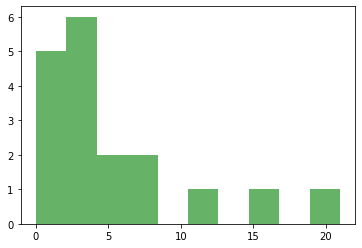

In [17]:
import matplotlib
matplotlib.use('TkAgg')
from matplotlib import pyplot as plt
plt.hist(X[1], alpha=0.6, color='g')

(array([5., 6., 2., 2., 0., 1., 0., 1., 0., 1.]),
 array([ 0. ,  2.1,  4.2,  6.3,  8.4, 10.5, 12.6, 14.7, 16.8, 18.9, 21. ]),
 <BarContainer object of 10 artists>)

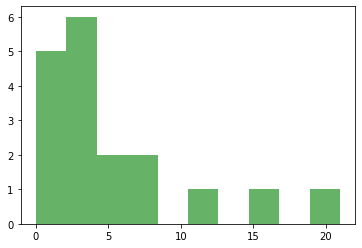

In [18]:
# либо
import matplotlib.pyplot as plt
plt.hist(X[1], alpha=0.6, color='g')

In [19]:
X1_mean = X[1].mean()
print('средний стаж работы дизайнера:', X1_mean)
 
X1_std = X[1].std()
print('среднее квадратичное отклонение', X1_std)
 
X_standarted = X.copy().astype(np.float64)
X_standarted[1] = (X[1] - X1_mean) / X1_std
print(X_standarted)

средний стаж работы дизайнера: 5.555555555555555
среднее квадратичное отклонение 5.377134947805716
[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [-8.47208709e-01 -4.75263422e-01 -2.89290779e-01 -1.03318135e-01
   1.01251773e+00 -1.03318135e+00  4.54599795e-01  8.26545082e-02
  -4.75263422e-01  2.68627152e-01  1.94238094e+00 -1.03318135e+00
  -6.61236065e-01 -4.75263422e-01 -6.61236065e-01 -2.89290779e-01
   2.87224416e+00 -2.89290779e-01]
 [ 6.50000000e+04  8.00000000e+04  8.50000000e+04  7.50000000e+04
   1.20000000e+05  2.50000000e+04  6.50000000e+04  6.50000000e+04
   2.90000000e+04  3.66500000e+04  2.60000000e+05  1.20000000e+04
   3.50000000e+04  4.56000000e+04  2.50000000e+04  6.50000000e+04
   1.75000000e+05  7.30000000e+04]]


In [20]:
# Отрицательные значения в результате это то, что меньше среднего. 
# Идеально среднее значение будет равно нулю, подсчитаем его по первому признаку:

def calc_feature_std(x):
    result = (x - x.mean()) / x.std()
    return result
X_standarted[2] = calc_feature_std(X[2])
print(X_standarted[2])

# Данные стандартизировались. Алгоритмам проще работать с признаками в стандартизированном виде. 
# На практике специалисты пробуют и стандартизацию, и нормализацию, выбирая наиболее подходящий способ масштабирования данных, аксиомы тут нет.

[-0.15764177  0.09837795  0.18371785  0.01303804  0.78109718 -0.84036101
 -0.15764177 -0.15764177 -0.77208908 -0.64151903  3.17061451 -1.06224476
 -0.6696812  -0.4887606  -0.84036101 -0.15764177  1.71983613 -0.02109792]


<h1>Python Scikit-learn: Линейная регрессия и SVM</h1>

In [21]:
# Возьмем Scikit-learn, в нем есть почти все нужные алгоритмы машинного обучения.
# Нам главное — решить задачу. Итак, создадим наш набор данных

import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import pandas as pd
 
def generate_dataset(n):
    x = [] 
    y = [] 
    random_x1 = np.random.rand()
    random_x2 = np.random.rand() 
    random_x3 = np.random.rand()
    random_x4 = np.random.rand()
    random_x5 = np.random.rand() 
    random_x6 = np.random.rand()
    random_x7 = np.random.rand() 
    for i in range(n): 
        x0 = i + np.random.rand() / 0.215 * 3.237
        x1 = i + np.random.rand() / 0.211 * 0.698
        x2 = i/2 + np.random.rand() - 1024 * 0.002 * 0.02 * 0.05
        x3 = i * 0.12 + np.random.rand() * 0.054
        x4 = i/1.42 + np.random.rand()
        x5 = i + 1 * 12 + np.random.rand() * 0.25
        x6 = i/4 + np.random.rand()
        x7 = i + np.random.rand()
        x.append([x0, x1, x2, x3, x4, x5, x6, x7]) 
        y.append(random_x1 * x1 + 1 + random_x2 * x2 + 1 + random_x3 * x3 + 1 + random_x4 * x4 + 1
                 + random_x5 * x5 + random_x6 * x6 + + random_x7 * x7) 
    return np.array(x), np.array(y) 
 
x, y = generate_dataset(3000) 
X = pd.DataFrame(x)
y = pd.DataFrame(y)
X.columns = ['UI', 'UX', 'Payment', 'MRPPU', 'CPA', 'ARPPU', 'Tools', 'TSDB']
y.columns = ['Price_for_freelancers']

display(X.head(), y.head())

,UI,UX,Payment,MRPPU,CPA,ARPPU,Tools,TSDB
0,6.319198,1.138523,0.894866,0.002440,0.418893,12.226309,0.800379,0.277260
1,11.346108,1.958677,0.916285,0.165704,1.649946,13.008662,1.167110,1.210324
2,10.853067,3.303166,1.487594,0.267133,1.974418,14.092832,1.386364,2.993851
3,4.954018,3.501818,1.583971,0.377622,2.290452,15.158165,1.730341,3.741826
4,12.698464,5.586376,2.139095,0.483847,3.329945,16.024220,1.301580,4.536269


,Price_for_freelancers
0,6.751361
1,8.538630
2,11.089474
3,12.098576
4,14.408471


В примере выше мы вывели в таблицу <b>X</b> признаки, а в таблицу <b>y</b> целевые значения: Price_for_freelancers это величина, которую мы хотим предсказать, то есть цена на фрилансеров.

      Price_for_freelancers           UI           UX      Payment  \
0                  6.751361     6.319198     1.138523     0.894866   
1                  8.538630    11.346108     1.958677     0.916285   
2                 11.089474    10.853067     3.303166     1.487594   
3                 12.098576     4.954018     3.501818     1.583971   
4                 14.408471    12.698464     5.586376     2.139095   
...                     ...          ...          ...          ...   
2995            6010.767521  3004.165055  2996.143906  1497.513924   
2996            6013.352440  2999.751522  2998.280937  1498.936822   
2997            6014.564193  3007.056674  2997.971139  1499.302237   
2998            6016.288864  3001.958383  2999.515087  1499.328371   
2999            6019.504716  3006.299679  3001.565319  1499.653643   

           MRPPU          CPA        ARPPU       Tools         TSDB  
0       0.002440     0.418893    12.226309    0.800379     0.277260  
1       0.165704   

/Users/ilkhom/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


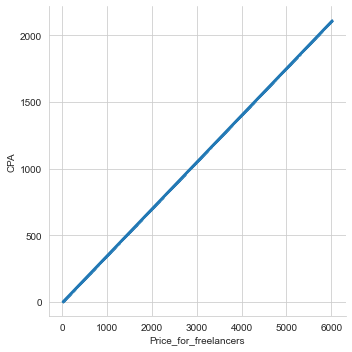

In [22]:
import seaborn as sns
new_df = pd.concat([y.reset_index(drop=True), X.reset_index(drop=True)], axis=1)
print(new_df)
 
sns.set_style('whitegrid') 
sns.lmplot('Price_for_freelancers', 'CPA', new_df, palette ='plasma', scatter_kws ={'s':0.4});

In [23]:
# Используем функцию train_test_split, очень популярный способ деления данных на тестовую и проверочную выборку.
# Получается, что тренировочная выборка 75% и 25% тестовая. random_state не задаем. Начнем строить модель
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(y_pred)

# В примере выше мы вызываем линейную регрессию, обучаем по X_train, y_train, и делаем предсказание по X_test. 
# В результате работы lr.fit мы получаем LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False). 
# И методом predict получаем предсказанные значения.

[[1319.15268723]
 [  86.50546744]
 [5971.71322386]
 [2389.45234904]
 [3920.0501286 ]
 [2574.35731455]
 [2664.26901492]
 [ 135.26213875]
 [4124.09073688]
 [1306.14605206]
 [1896.68557883]
 [1287.27948754]
 [2475.98180762]
 [1329.6994341 ]
 [3028.97076691]
 [4332.37836191]
 [5451.24111099]
 [5264.81470531]
 [3909.72759315]
 [3654.03458701]
 [5729.30375011]
 [1995.01686411]
 [ 903.70917019]
 [4488.78426728]
 [5117.57778895]
 [5320.56372446]
 [5590.42976839]
 [1256.25320902]
 [1368.99442668]
 [4367.01932957]
 [4043.30050637]
 [1084.06491216]
 [4887.54147058]
 [ 375.5528731 ]
 [5958.7713478 ]
 [2604.1608898 ]
 [1456.23956169]
 [2293.36279828]
 [4128.36277276]
 [5964.7291178 ]
 [5577.61862815]
 [5643.35464976]
 [1579.908426  ]
 [4411.91774779]
 [3542.88290173]
 [ 111.08146742]
 [2877.15365386]
 [4595.84541248]
 [5910.96304783]
 [4475.52801234]
 [4950.40459104]
 [2483.3711412 ]
 [2473.98379926]
 [4754.46574323]
 [ 952.05394461]
 [3360.4256238 ]
 [2289.43344275]
 [ 601.21079191]
 [5865.9176724

In [24]:
# Но мы же наверняка хотим сопоставить предсказанные и полученные значения, верно?
check_test = pd.DataFrame({
    "y_test": y_test["Price_for_freelancers"],
    "y_pred": y_pred.flatten(),
})
 
check_test.head(10)

,y_test,y_pred
655,1319.152687,1319.152687
40,86.505467,86.505467
2975,5971.713224,5971.713224
1189,2389.452349,2389.452349
1952,3920.050129,3920.050129
1281,2574.357315,2574.357315
1325,2664.269015,2664.269015
64,135.262139,135.262139
2054,4124.090737,4124.090737
648,1306.146052,1306.146052


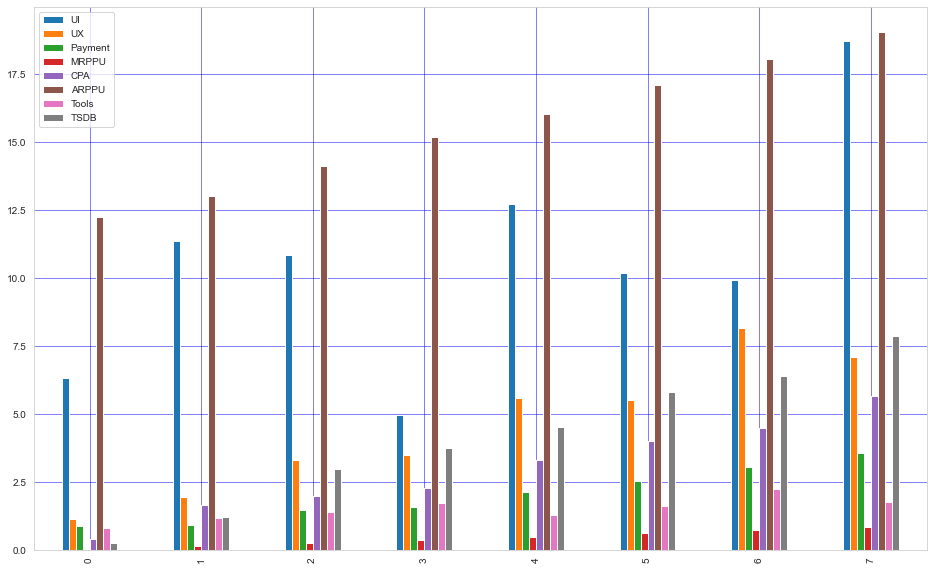

In [25]:
# Тест и предсказание одинаковые. Если визуализировать данные, то все становится примерно понятно:
strangeDataCheck = X.head(8)
strangeDataCheck.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='blue')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
plt.show()

In [26]:
# Но давайте займемся всякими проверками и узнаем, почему такой странный результат. 
# Существует метрика, которая показывает, насколько сильны отклонения при условии X=Y. 
# Вызываем из класса metrics r2_score, получаем коэффициент детерминации.
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

# В нашем случае коэффицент детерминации = 1, что практически идеально, но невозможно при работе с реальными данными.

1.0

Описанное выше это простой метод классификации. Но если мы хотим к классификации добавить еще и регрессию, то тогда нужно использовать случайный лес. В примере ниже разберем алгоритм из деревьев решений под названием <b>случайный лес</b>. Для каждого дерева выбирается подмножество признаков из тестовой выборки, и идет обучение. Каждое дерево дает некий ответ, и если за один ответ проголосовало наибольшее количество деревьев, то этот ответ считается победителем.

In [27]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=2000, max_depth=18)
model.fit(X_train, y_train.values[:, 0])
y_pred_forest = model.predict(X_test)
r2_score(y_test, y_pred_forest)

0.9999996167722496

In [28]:
print(lr.intercept_)
print(lr.coef_)

[4.]
[[-3.70090659e-15  7.23696632e-01  6.20196687e-01  4.76203632e-01
   2.78134353e-01  4.38642186e-02  7.27112586e-01  4.92277568e-01]]


               UI           UX      Payment       MRPPU          CPA  \
2195  2204.924986  2196.847941  1098.131256  263.401430  1546.109108   
297    306.713547   299.696047   148.703750   35.670705   209.443876   
1464  1468.156618  1466.295549   732.062808  175.690250  1031.938041   
1147  1149.469279  1148.031561   574.284533  137.656832   808.088239   
2028  2037.387795  2028.108012  1014.146749  243.413714  1428.520219   
...           ...          ...          ...         ...          ...   
2653  2655.679702  2654.508558  1327.336635  318.372050  1869.183808   
2377  2379.077701  2378.788177  1188.930087  285.252137  1674.531455   
1203  1214.093101  1206.245456   602.272757  144.370019   847.393749   
1399  1406.109322  1401.393681   699.872403  167.906044   985.637089   
2402  2405.709455  2405.241062  1201.695289  288.279375  1692.509178   

            ARPPU       Tools         TSDB  
2195  2207.017751  549.150397  2195.055837  
297    309.084591   74.274058   297.082100  


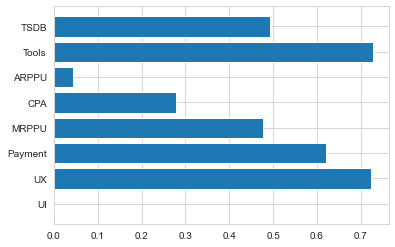

In [29]:
from matplotlib import pyplot as plt
%config inlineBackend.figure_format = 'svg'
%matplotlib inline
plt.barh(X_train.columns, lr.coef_.flatten())
print(X_train)

Text(0.5, 1.0, 'Масштаб признаков')

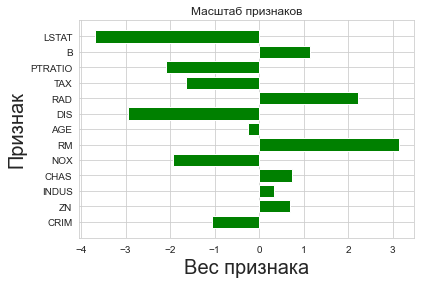

In [30]:
# В примере ниже мы возьмем набор данных, в котором признаки имеют разный масштаб разброса значений. 
# И нужна стандартизация. От значения признака отнимается среднее по данному признаку и делится на среднее квадратичное отклонение.

import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt
%config inlineBackend.figure_format = 'svg'
%matplotlib inline
 
boston = load_boston()
X = boston.data
y = boston.target
X = pd.DataFrame(X, columns=boston.feature_names)
feature_names = boston['feature_names']
 
 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)
lr.fit(X_train_scaled, y_train)
 
plt.barh(X_train.columns, lr.coef_.flatten(), color = "green")
plt.xlabel('Вес признака', fontsize = 20)
plt.ylabel('Признак', fontsize = 20)
plt.title("Масштаб признаков")


In [32]:
feature_names = ['UI', 'UX', 'Payment', 'MRPPU', 'CPA', 'ARPPU', 'Tools', 'TSDB']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)
 
lr.fit(X_train_scaled, y_train)
# from matplotlib import pyplot as plt
%config inlineBackend.figure_format = 'svg'
%matplotlib inline
plt.barh(X_train_scaled.columns, lr.coef_.flatten())
plt.xlabel('вес признака')
plt.ylabel('признак')
 
print(X_train.describe())
print(X_train_scaled.describe())

ValueError: Shape of passed values is (379, 13), indices imply (379, 8)